In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings
import numpy as np
from sklearn.svm import SVC

In [ ]:
def plot_boundary(X, y, classifier, resolution=0.02):
    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    output = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    output = output.reshape(xx1.shape)
    plt.contourf(xx1, xx2, output, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [ ]:
# Non linear Data
np.random.seed(0)
X = np.random.randn(200,2)
y = np.logical_xor(X[:, 0]>0, X[:, 1]>0)
y = np.where(y, 1, -1)

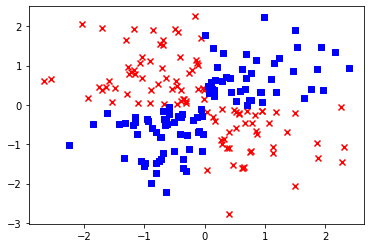

In [ ]:
#Visualize Data
plt.scatter(X[y == 1, 0], X[y == 1, 1], c = 'r', label = 1, marker = 'x')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c = 'b', label = 1, marker = 's')
plt.show()

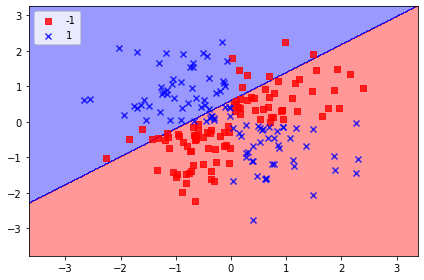

In [ ]:
# Linear Classifier
svm = SVC(kernel='linear', C=1, random_state=0)
svm.fit(X, y)

plot_boundary(X, y, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

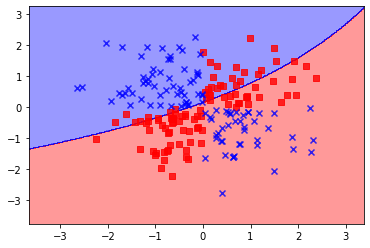

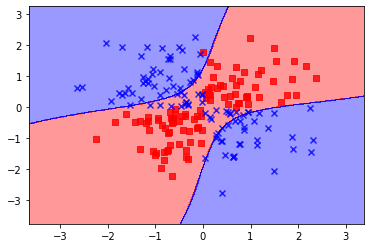

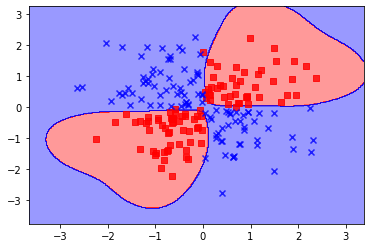

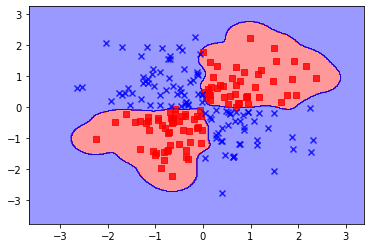

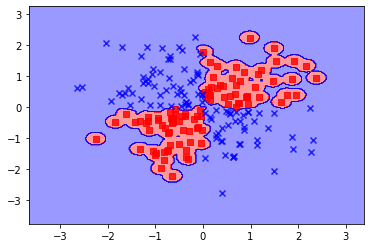

In [ ]:
for gm in [0.01, 0.1, 1, 10, 100]:
    svm = SVC(kernel='rbf', C=1, random_state=0, gamma=gm)
    svm.fit(X, y)
    plot_boundary(X, y, svm)
    plt.show()

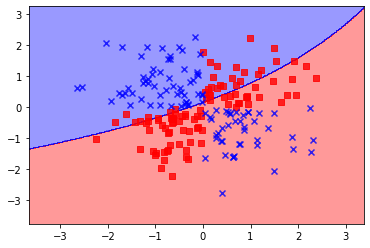

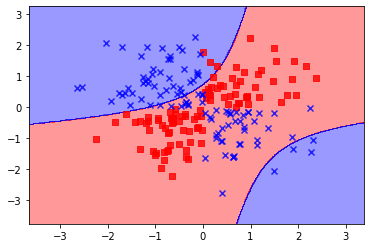

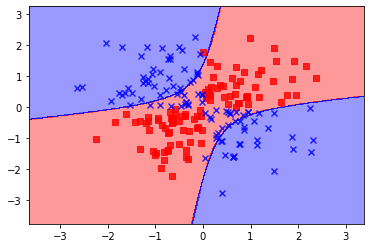

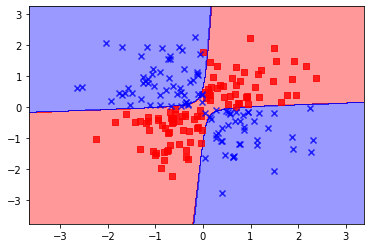

In [ ]:
for c in [1, 10, 100, 1000]:
    svm = SVC(kernel='rbf', C=c, random_state=0, gamma=0.01)
    svm.fit(X, y)
    plot_boundary(X, y, svm)
    plt.show()